# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV


In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# New file added
dogDataSet_filename = os.path.join(os.getcwd(), "data", "dogs_cleaned.csv")


df = pd.read_csv(dogDataSet_filename, header = 0)

df.head(10)

,Breed Name,Detailed Description Link,Dog Size,Dog Breed Group,Height,"Avg. Height, cm",Weight,"Avg. Weight, kg",Life Span,"Avg. Life Span, years",...,Intelligence,Potential For Mouthiness,Prey Drive,Tendency To Bark Or Howl,Wanderlust Potential,Physical Needs,Energy Level,Intensity,Exercise Needs,Potential For Playfulness
0,Afador,https://dogtime.com/dog-breeds/afador,Very Large,Mixed Breed Dogs,20 to 29 inches,62.23,50 to 75 pounds,28.12,10 to 12 years,11.0,...,5,4,4.0,4.0,4,4.00,4,4,4,3
1,Affenhuahua,https://dogtime.com/dog-breeds/affenhuahua,Small,Mixed Breed Dogs,6 to 12 inches,22.86,4 to 12 pounds,3.60,13 to 18 years,16.0,...,3,4,2.0,4.0,2,3.33,4,3,3,3
2,Affenpinscher,https://dogtime.com/dog-breeds/affenpinscher,Small,Companion Dogs,9 to 11 inches tall at the shoulder,25.40,7 to 9 pounds,3.60,12 to 14 years,13.0,...,4,4,3.0,2.0,2,3.33,4,3,3,4
3,Afghan Hound,https://dogtime.com/dog-breeds/afghan-hound,Very Large,Hound Dogs,24 to 26 inches tall at the shoulder,63.50,50 to 60 pounds,24.75,10 to 12 years,11.0,...,4,3,5.0,2.0,5,3.67,5,2,4,4
4,Airedale Terrier,https://dogtime.com/dog-breeds/airedale-terrier,Very Large,Terrier Dogs,21 to 23 inches tall at the shoulder,55.88,40 to 65 pounds,23.62,10 to 13 years,12.0,...,5,5,5.0,4.0,4,4.33,5,3,5,5
5,Akbash,https://dogtime.com/dog-breeds/akbash,Very Large,Working Dogs,27 to 34 inches,77.47,75 to 140 pounds,48.38,10 to 12 years,11.0,...,4,3,1.0,3.0,1,2.00,2,2,2,3
6,Akita,https://dogtime.com/dog-breeds/akita,Very Large,Working Dogs,24 inches to 28 tall at the shoulder,66.04,70 to 130 pounds,45.00,10 to 12 years,11.0,...,3,3,4.0,5.0,4,3.67,4,3,4,5
7,Akita Chow,https://dogtime.com/dog-breeds/akita-chow,Very Large,Mixed Breed Dogs,23 to 25 inches,60.96,88 to 145 pounds,52.42,10 to 12 years,11.0,...,4,3,4.0,2.0,3,4.00,4,4,4,2
8,Akita Pit,https://dogtime.com/dog-breeds/akita-pit,Very Large,Mixed Breed Dogs,16 to 23 inches,49.53,30 to 70 pounds,22.50,10 to 12 years,11.0,...,4,3,4.0,3.0,1,3.33,3,4,3,3
9,Akita Shepherd,https://dogtime.com/dog-breeds/akita-shepherd,Very Large,Mixed Breed Dogs,24 to 28 inches,66.04,75 to 120 pounds,43.88,10 to 13 years,12.0,...,4,2,3.0,1.0,2,3.33,3,3,4,3


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classification or multi-class classification problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The dataset I have chosen is dogs_cleaned.csv, a data set that includes many details and information about various dog breeds.
2. In this dataset, I will be predicting whether or not a particular dog breed is suitable for new-time dog owners based on its inherent features. The label will be "Good for Novice Owners."
3. This will be a supervised learning problem, and I will specifically be using multi-class classification for my outcome when considering the maintenance level and qualities of different breeds. 
4. My features will include intelligence, tendency to bark or howl, physical needs, energy level, intensity, and exercise needs, as these details seem the most relevant to the problem.
5. This problem is important because it provides first-time dog owners with valuable insight into whether they can handle a particular breed. Unfortunately, many people give their new pets away, surrender them to shelters, or even abandon them after finding them too difficult or expensive to care for. With this model, a company such as a vets office, adoption agency, or shelter may be able to help its customers find the right breed to start off with and reduce pet abandonment overall. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
#Retrieving dataset dimensions
df.shape

(391, 41)

In [5]:
#Retrieving dataset statistics
df.describe()

,"Avg. Height, cm","Avg. Weight, kg","Avg. Life Span, years",Adaptability,Adapts Well To Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,...,Intelligence,Potential For Mouthiness,Prey Drive,Tendency To Bark Or Howl,Wanderlust Potential,Physical Needs,Energy Level,Intensity,Exercise Needs,Potential For Playfulness
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,...,391.000000,391.000000,390.000000,390.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,46.798926,22.050997,12.593350,2.966752,2.989770,2.790281,3.675192,2.081841,3.296675,2.987212,...,4.092072,3.030691,3.410256,3.094872,3.179028,3.787801,4.056266,3.324808,3.982097,4.268542
std,15.277867,15.447184,1.551131,0.516218,1.481475,1.177571,0.864913,0.916209,1.156460,0.892901,...,0.717341,0.952233,1.165440,1.126326,1.195577,0.764186,0.872312,0.984169,0.943092,0.814615
min,15.240000,2.020000,7.000000,1.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.670000,1.000000,1.000000,1.000000,1.000000
25%,34.290000,9.000000,12.000000,2.600000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,...,4.000000,2.000000,3.000000,2.000000,2.000000,3.330000,4.000000,3.000000,3.000000,4.000000
50%,48.260000,21.150000,12.000000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,59.690000,29.365000,14.000000,3.400000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,4.330000,5.000000,4.000000,5.000000,5.000000
max,85.090000,81.000000,17.000000,4.400000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
#Listing all column names 
colnames = [x for x in list(df.columns)]
colnames

['Breed Name',
 'Detailed Description Link',
 'Dog Size',
 'Dog Breed Group',
 'Height',
 'Avg. Height, cm',
 'Weight',
 'Avg. Weight, kg',
 'Life Span',
 'Avg. Life Span, years',
 'Adaptability',
 'Adapts Well To Apartment Living',
 'Good For Novice Owners',
 'Sensitivity Level',
 'Tolerates Being Alone',
 'Tolerates Cold Weather',
 'Tolerates Hot Weather',
 'All Around Friendliness',
 'Affectionate With Family',
 'Kid-Friendly',
 'Dog Friendly',
 'Friendly Toward Strangers',
 'Health And Grooming Needs',
 'Amount Of Shedding',
 'Drooling Potential',
 'Easy To Groom',
 'General Health',
 'Potential For Weight Gain',
 'Size',
 'Trainability',
 'Easy To Train',
 'Intelligence',
 'Potential For Mouthiness',
 'Prey Drive',
 'Tendency To Bark Or Howl',
 'Wanderlust Potential',
 'Physical Needs',
 'Energy Level',
 'Intensity',
 'Exercise Needs',
 'Potential For Playfulness']

In [7]:
#Importing new packages
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
sns.set_theme() 

In [8]:
#Selecting and creating a label and features (which are tweaked during the process)
label = 'Good For Novice Owners'
feature_list = [ 
     'Adaptability', 'Adapts Well To Apartment Living', 'Dog Friendly', 'Friendly Toward Strangers', 'All Around Friendliness', 'Easy To Train', 'Avg. Life Span, years', 'Affectionate With Family', 'Kid-Friendly', 'Potential For Playfulness', 'Sensitivity Level', 'Tendency To Bark Or Howl', 'Energy Level', 'General Health', 'Trainability', 'Intelligence', 'Potential For Mouthiness', 'Amount Of Shedding', 'Health And Grooming Needs', 'Physical Needs', 'Exercise Needs', 'Drooling Potential', 'Easy To Groom', 'Intensity'
]

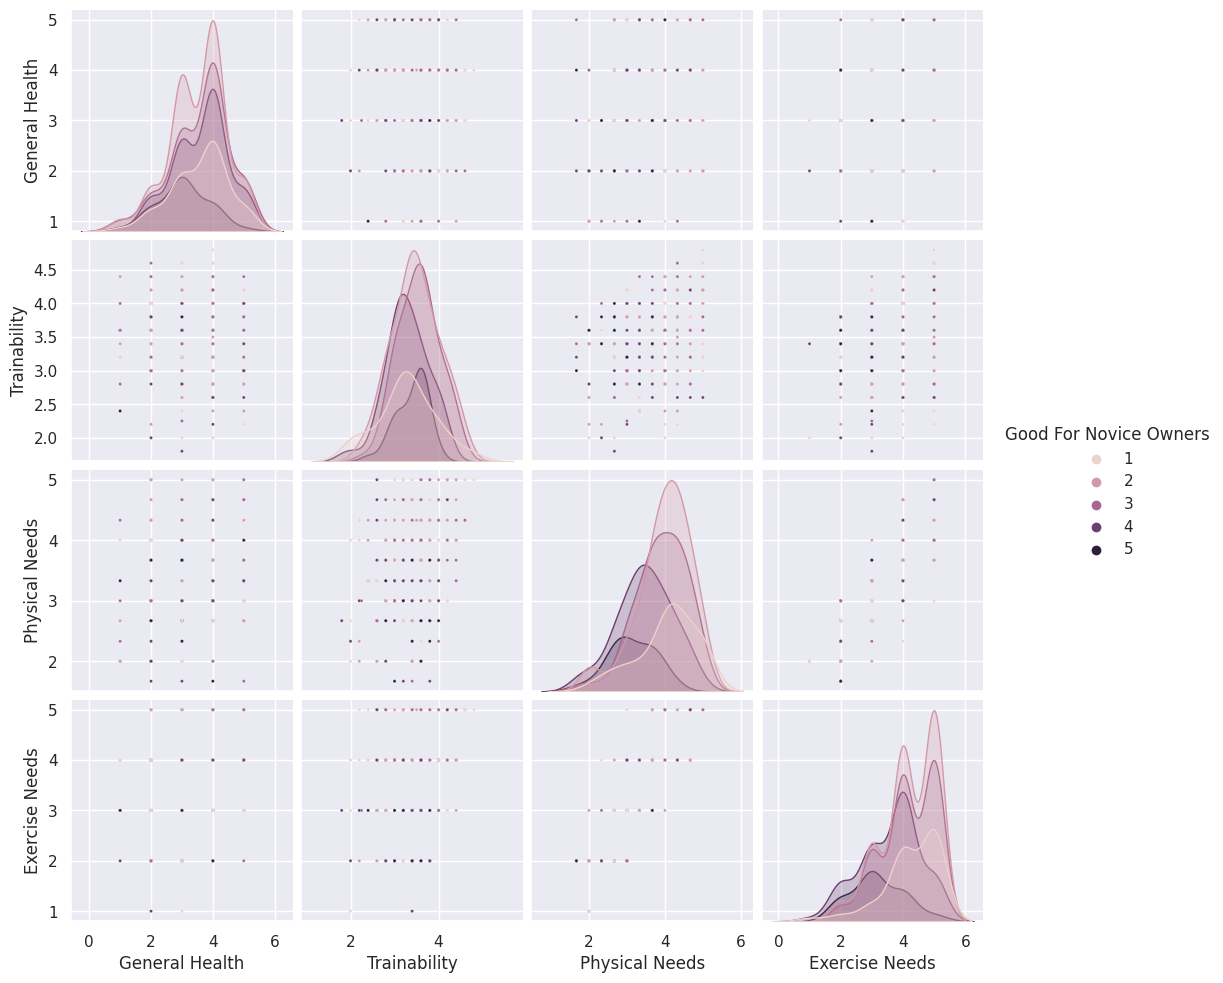

In [9]:
#Filtering and pair-plotting select data
df_sub = df[['General Health', 'Trainability', 'Physical Needs', 'Exercise Needs', 'Good For Novice Owners']].copy()
sns.pairplot(data=df_sub, hue = 'Good For Novice Owners', plot_kws={'s':5})

In [10]:
#Checking for outliers
df['label_novice'] = stats.mstats.winsorize(df['Good For Novice Owners'], limits=[0.01, 0.01])
print("Check if indentical: ", (df['Good For Novice Owners']-df['label_novice']).unique())

Check if indentical:  [0]


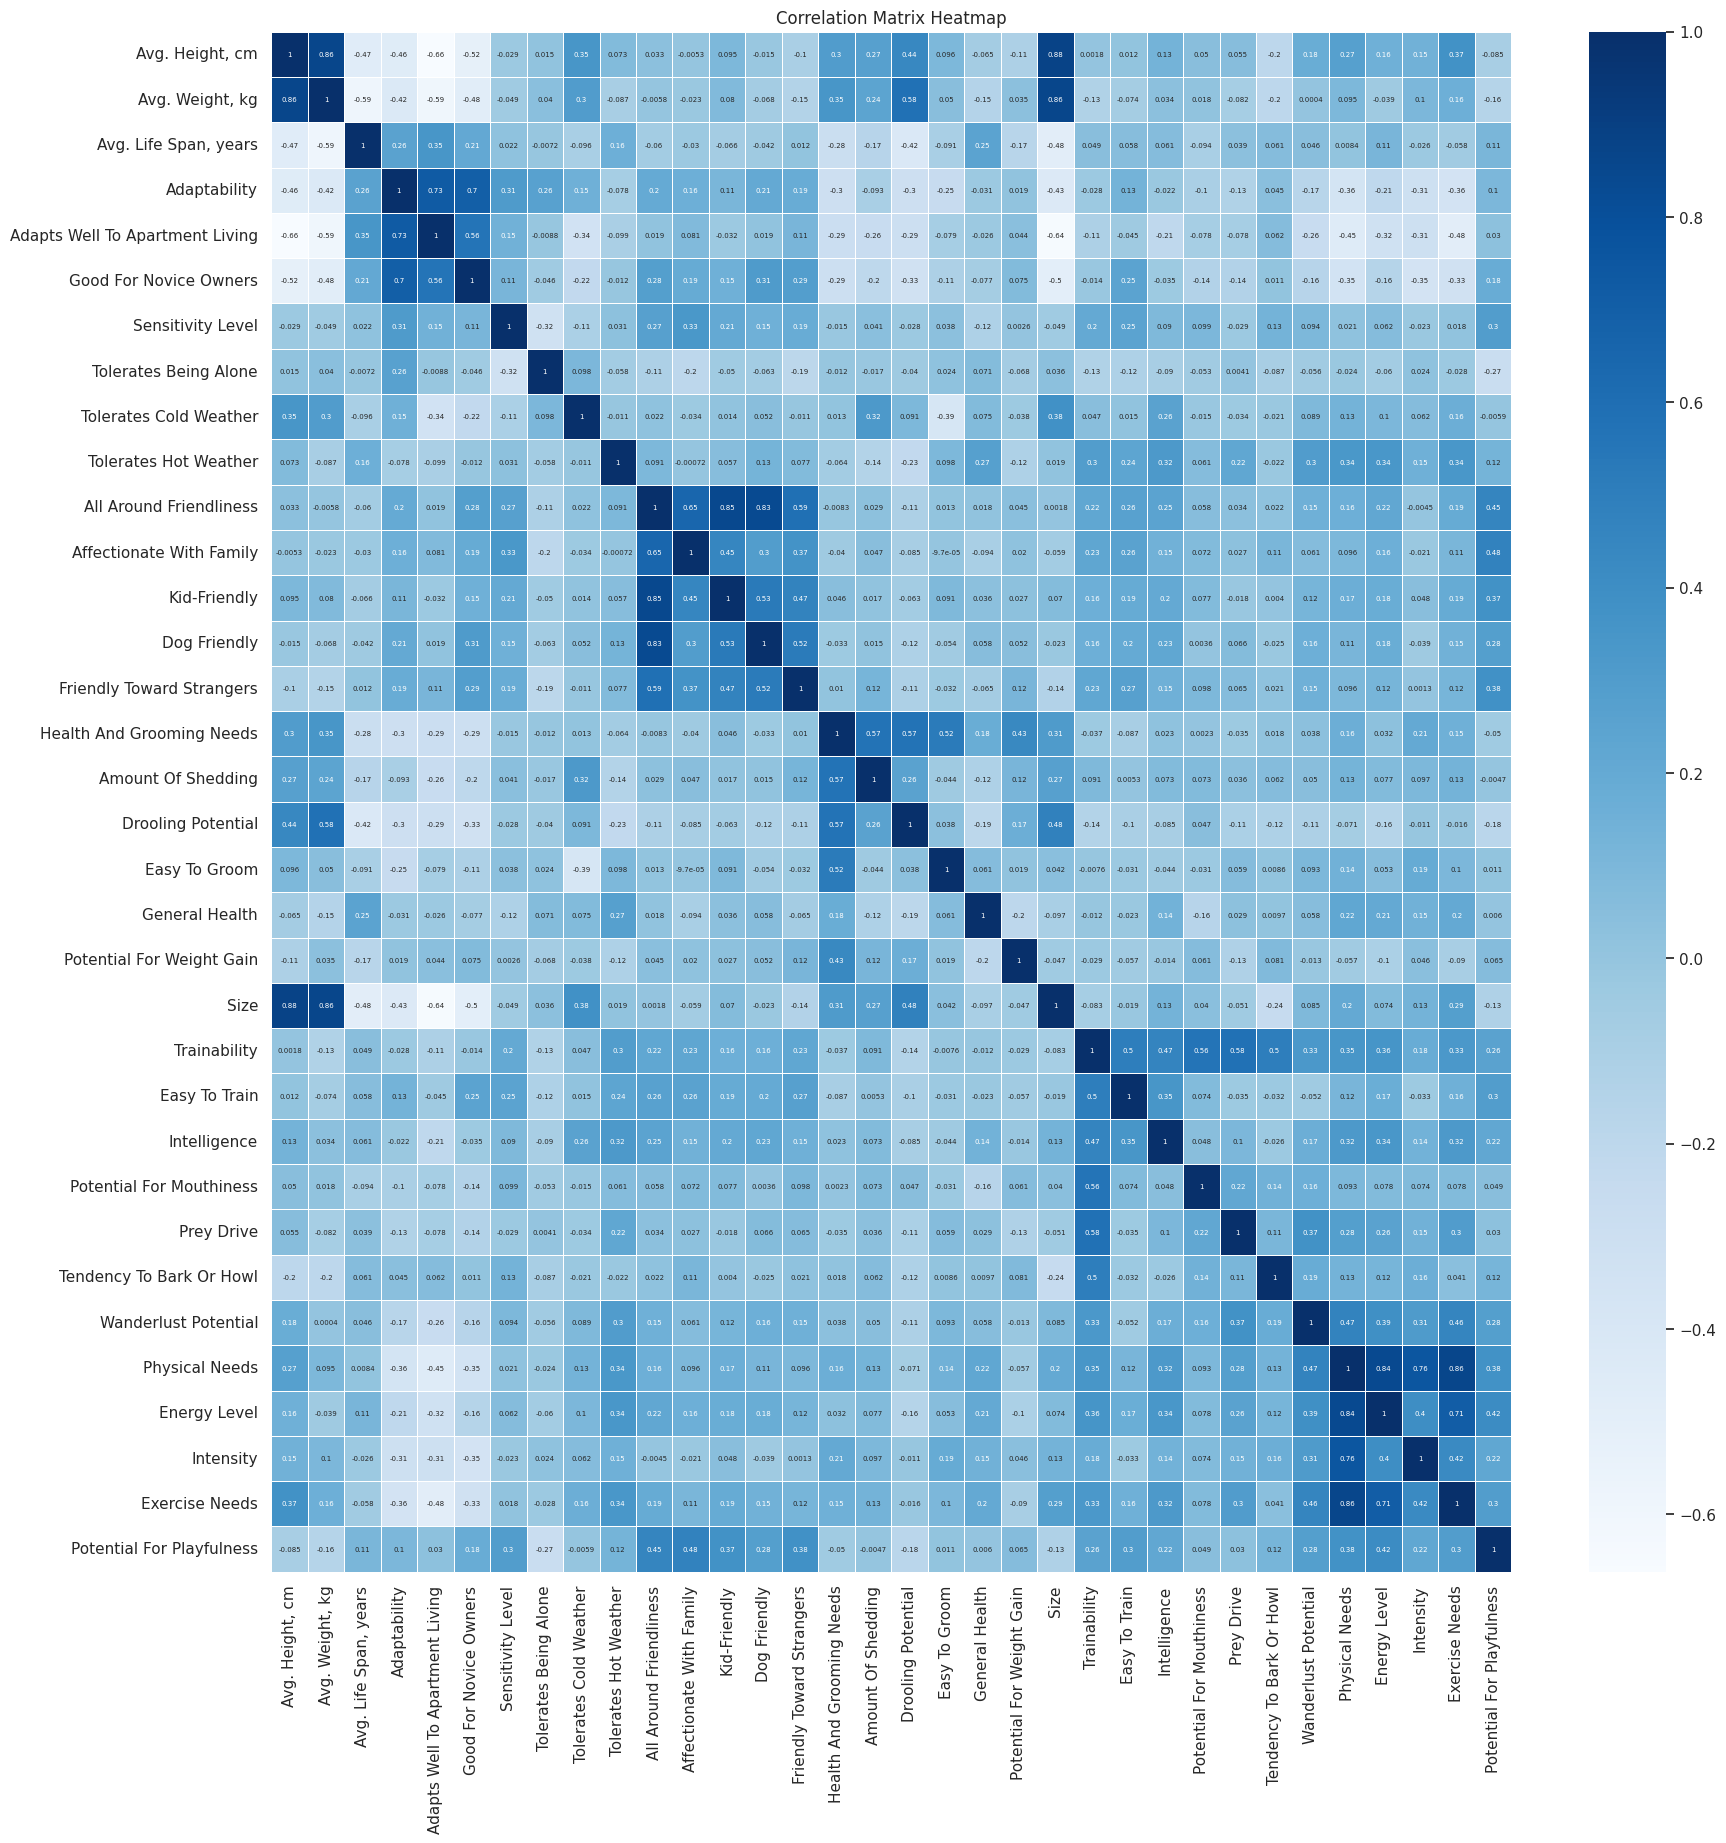

In [11]:
#Checking and visualizing correlations
corrs = df[colnames].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrs, annot=True, cmap = 'Blues', linewidths=.5, annot_kws={'size': 5})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
#Checking for missing data
nan_count = np.sum(df.isnull(), axis = 0)
print("Missing values per column:\n", nan_count)

print("\n")


nan_detected = nan_count!=0
print("Columns with missing values:\n", nan_detected[nan_detected])

print("\n")

col_names = nan_count[nan_detected].index 
nan_col_types = df[col_names].dtypes
print("Missing value data types:\n", nan_col_types)

print("\n")

print("Missing count overall: {}".format(np.sum(df.isnull().sum())))


Missing values per column:
 Breed Name                         0
Detailed Description Link          0
Dog Size                           0
Dog Breed Group                    0
Height                             0
Avg. Height, cm                    0
Weight                             0
Avg. Weight, kg                    0
Life Span                          0
Avg. Life Span, years              0
Adaptability                       0
Adapts Well To Apartment Living    0
Good For Novice Owners             0
Sensitivity Level                  0
Tolerates Being Alone              0
Tolerates Cold Weather             0
Tolerates Hot Weather              0
All Around Friendliness            0
Affectionate With Family           0
Kid-Friendly                       0
Dog Friendly                       0
Friendly Toward Strangers          0
Health And Grooming Needs          0
Amount Of Shedding                 0
Drooling Potential                 1
Easy To Groom                      0
General He

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Yes, I have a feature list that contains all of the original elements. Upon further inspection of the data, I have chosen to add additional features: adaptability, adapts well to apartment living, dog friendly, friendly toward strangers, all around friendliness, easy to train, avg. life span, years, affectionate with family, kid-friendly, potential for playfulness, sensitivity level, general health, trainability, intelligence, potential for mouthiness, amount of shedding, health and grooming needs, physical needs, drooling potential, and easy to groom. I plan on addressing the missing values I detected in my data by replacing them with mean values. I also plan on scaling the data to improve performance. The models I plan on using are K-Nearest Neighbors, Random Forest, Decision Trees, and Gradient Boosted Decision Trees. My plan is to first create labeled examples of the data and use them to make training and testing sets. Then, once I have trained and tested each of my models, I will evaluate how well they perform based on metrics such as accuracy score, confusion matrix, f-1 score, and log loss. I will also visualize and compare them to each other to see which has generalized best to new data. Throughout the process, I will fine-tune the parameters and features, adjusting my models according to new insights so that they may generate the best results.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [99]:
#Importing new packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, accuracy_score, confusion_matrix, precision_recall_curve, mean_squared_error, r2_score, log_loss, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [100]:
#Addressing missing data

#Creating dummies
df['Drooling Potential_na'] = df['Drooling Potential'].isnull()
df['Prey Drive_na'] = df['Prey Drive'].isnull()
df['Tendency To Bark Or Howl_na'] = df['Tendency To Bark Or Howl'].isnull()
df.head(0)

,Breed Name,Detailed Description Link,Dog Size,Dog Breed Group,Height,"Avg. Height, cm",Weight,"Avg. Weight, kg",Life Span,"Avg. Life Span, years",...,Wanderlust Potential,Physical Needs,Energy Level,Intensity,Exercise Needs,Potential For Playfulness,label_novice,Drooling Potential_na,Prey Drive_na,Tendency To Bark Or Howl_na


In [101]:
#Filling in missing data
mean_drool = df['Drooling Potential'].mean()
df['Drooling Potential'].fillna(value=mean_drool, inplace=True)

mean_prey = df['Prey Drive'].mean()
df['Prey Drive'].fillna(value=mean_prey, inplace=True)

mean_bark = df['Tendency To Bark Or Howl'].mean()
df['Tendency To Bark Or Howl'].fillna(value=mean_bark, inplace=True)

print("Drooling Potential missing count: {} \n".format(np.sum(df["Drooling Potential"].isnull(), axis = 0)))
print("Prey Drive missing count: {} \n".format(np.sum(df["Prey Drive"].isnull(), axis = 0)))
print("Tendency To Bark Or Howl missing count: {} \n".format(np.sum(df["Tendency To Bark Or Howl"].isnull())))
print("Missing count overall: {} \n".format(df.isnull().sum().sum(), axis = 0))

Drooling Potential missing count: 0 

Prey Drive missing count: 0 

Tendency To Bark Or Howl missing count: 0 

Missing count overall: 0 



In [111]:
#Training the model 
    
#Creating labeled examples
y=df[label]
X=df[feature_list]
    
#Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)

#Scaling data
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [120]:
#Training with KNN

def train_knn(X_train, X_test, y_train, y_test):

    #Setting up a parameter grid
    num_examples = X_train.shape[0] 
    hyperparams = np.linspace(1, int(np.sqrt(num_examples)*10), num=50, dtype=int).tolist()
    param_grid = {
        'n_neighbors':hyperparams
    }
    
    #Getting the best value of k using grid search cross validation
    knn_model = KNeighborsClassifier()
    grid = GridSearchCV( knn_model, param_grid, cv=4)
    grid_search = grid.fit(X_train, y_train)
    best_k = grid_search.best_params_['n_neighbors']
    
    #Training and fitting the model
    best_model = KNeighborsClassifier(n_neighbors=best_k)
    best_model.fit(X_train, y_train)
    
    #Making predictions
    probability_predictions = best_model.predict_proba(X_test)
    class_label_predictions = best_model.predict(X_test)

    #Evaluating with accuracy score
    acc_score = accuracy_score(y_test, class_label_predictions)

    #Evaluating with confusion matrix
    cm = confusion_matrix(y_test, class_label_predictions, labels=np.unique(y_test))
    cmdf = pd.DataFrame(
    cm,
    columns=np.unique(y_test),
    index=np.unique(y_test)
    )

    #Evaluating with f1-score
    f1 = f1_score(y_test, class_label_predictions, average='macro')

    #Evaluating with log loss
    l_loss = log_loss(y_test, probability_predictions)
    
    return acc_score, cmdf, f1, l_loss

In [166]:
#Training with RF
def train_rf(X_train, X_test, y_train, y_test):

    #Training and fitting the model
    rf_model = RandomForestClassifier(max_depth = 30, n_estimators = 200)
    rf_model.fit(X_train, y_train)

    #Making predictions
    probability_predictions = rf_model.predict_proba(X_test)
    class_label_predictions = rf_model.predict(X_test)

    #Evaluating with accuracy score
    acc_score = accuracy_score(y_test, class_label_predictions)

    #Evaluating with confusion matrix
    cm = confusion_matrix(y_test, class_label_predictions, labels=np.unique(y_test))
    cmdf = pd.DataFrame(
    cm,
    columns=np.unique(y_test),
    index=np.unique(y_test)
    )

    #Evaluating with f1-score
    f1 = f1_score(y_test, class_label_predictions, average='macro')
    
    #Evaluating with log loss
    l_loss = log_loss(y_test, probability_predictions)
    
    return acc_score, cmdf, f1, l_loss

In [167]:
#Training with DT
def train_dt(X_train, X_test, y_train, y_test):

    #Training and fitting the model
    model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 1)
    model.fit(X_train, y_train)

    #Making predictions
    probability_predictions = model.predict_proba(X_test)
    class_label_predictions = model.predict(X_test)

    #Evaluating with accuracy score
    acc_score = accuracy_score(y_test, class_label_predictions)

    #Evaluating with confusion matrix
    cm = confusion_matrix(y_test, class_label_predictions, labels=np.unique(y_test))
    cmdf = pd.DataFrame(
    cm,
    columns=np.unique(y_test),
    index=np.unique(y_test)
    )
    
    #Evaluating with f1-score
    f1 = f1_score(y_test, class_label_predictions, average='macro')
    
    #Evaluating with log loss
    l_loss = log_loss(y_test, probability_predictions)
    
    return acc_score, cmdf, f1, l_loss

In [168]:
#Training with GBDT
def train_gbdt(X_train, X_test, y_train, y_test):

    #Training and fitting the model
    gbdt_model = GradientBoostingClassifier(max_depth = 8, n_estimators = 300)
    gbdt_model.fit(X_train, y_train)

    #Making predictions
    probability_predictions = gbdt_model.predict_proba(X_test)
    class_label_predictions = gbdt_model.predict(X_test)

    #Evaluating with accuracy score
    acc_score = accuracy_score(y_test, class_label_predictions)

    #Evaluating with confusion matrix
    cm = confusion_matrix(y_test, class_label_predictions, labels=np.unique(y_test))
    cmdf = pd.DataFrame(
    cm,
    columns=np.unique(y_test),
    index=np.unique(y_test)
    )

    #Evaluating with f1-score
    f1 = f1_score(y_test, class_label_predictions, average='macro')
    
    #Evaluating with log loss
    l_loss = log_loss(y_test, probability_predictions)
    
    return acc_score, cmdf, f1, l_loss

In [169]:
#Inspecting the model's performance

k_score, k_cmdf, k_f1, k_loss = train_knn(X_train, X_test, y_train, y_test)
print('KNN MODEL: \naccuracy score: ' + str(k_score))
print('f-1 score:', k_f1)
print('log loss:', k_loss)
print('Confusion Matrix:\n', k_cmdf )

print("\n")

r_score, r_cmdf, r_f1, r_loss  = train_rf(X_train, X_test, y_train, y_test)
print('RF MODEL: \naccuracy score: ' + str(r_score))
print('f-1 score:', r_f1)
print('log loss:', r_loss)
print('Confusion Matrix:\n', r_cmdf )

print("\n")

d_score, d_cmdf, d_f1, d_loss  = train_dt(X_train, X_test, y_train, y_test)
print('DT MODEL: \naccuracy score: ' + str(d_score))
print('f-1 score:', d_f1)
print('log loss:', d_loss)
print('Confusion Matrix:\n', d_cmdf )

print("\n")

g_score, g_cmdf, g_f1, g_loss  = train_gbdt(X_train, X_test, y_train, y_test)
print('GBDT MODEL: \naccuracy score: ' + str(g_score))
print('f-1 score:', g_f1)
print('log loss:', g_loss)
print('Confusion Matrix:\n', g_cmdf )


KNN MODEL: 
accuracy score: 0.575
f-1 score: 0.5195922357212679
log loss: 1.1968484171042266
Confusion Matrix:
    1  2  3  4  5
1  0  7  0  0  0
2  0  9  3  0  0
3  0  3  7  0  0
4  0  0  2  5  0
5  0  0  0  2  2


RF MODEL: 
accuracy score: 0.625
f-1 score: 0.6641821946169773
log loss: 1.0339007473808892
Confusion Matrix:
    1  2  3  4  5
1  4  3  0  0  0
2  1  6  5  0  0
3  0  1  7  2  0
4  0  1  1  5  0
5  0  0  0  1  3


DT MODEL: 
accuracy score: 0.475
f-1 score: 0.49501563864412157
log loss: 15.587975372446877
Confusion Matrix:
    1  2  3  4  5
1  3  3  1  0  0
2  2  6  3  1  0
3  1  4  2  3  0
4  0  0  1  6  0
5  0  0  0  2  2


GBDT MODEL: 
accuracy score: 0.4
f-1 score: 0.4148353096179183
log loss: 3.054357795344832
Confusion Matrix:
    1  2  3  4  5
1  2  4  0  1  0
2  1  3  7  1  0
3  2  2  5  0  1
4  0  1  1  4  1
5  0  0  0  2  2


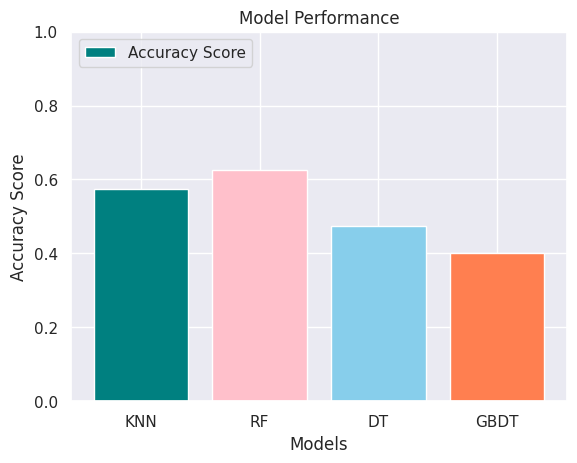

In [170]:
#Visualizing and comparing all models

Score_Results = [k_score, r_score, d_score, g_score]
colors = ['teal', 'pink', 'skyblue', 'coral']
rg= np.arange(4)
width = .8

plt.bar(rg, Score_Results, width, label="Accuracy Score", color = colors)

labels = ['KNN', 'RF', 'DT', 'GBDT']
plt.xticks(rg, labels)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()



Text(0.5, 1.0, 'RF Model Performance')

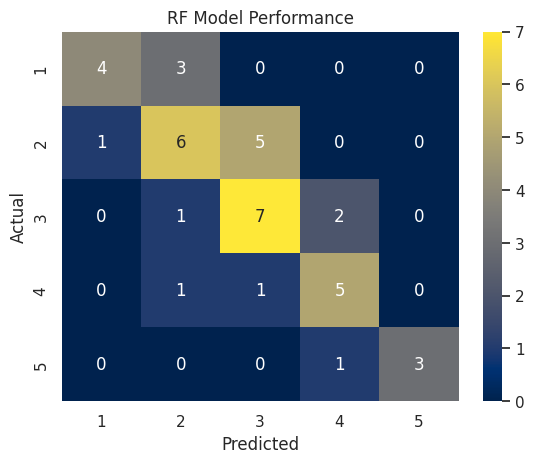

In [172]:
#Visualizing results of generally best overall model 
sns.heatmap(r_cmdf, annot=True, cmap='cividis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Model Performance')